# Example: Filtrations of boolean images
#### Authors: Guillaume Tauzin <guillaume.tauzin@epfl.ch>
##### License: TBD


This notebook contains a set of examples of image boolean filtrations.

The first step consists in importing the *giotto* library.

In [1]:
import numpy as np
from giotto.images import ImageInverter, HeightFiltration, DilationFiltration, RadialFiltration, ErosionFiltration, SignedDistanceFiltration

import matplotlib as mpl
import matplotlib.pyplot as plt

import itertools

In [2]:
def plot_images(images):
    n_images = images.shape[0]
    n_z = images.shape[3] if len(images.shape) == 4 else 1
    figure, axes = plt.subplots(n_z, n_images, figsize=(18,8+(n_z-1)*5))
    
    iterator = tuple(itertools.product(range(n_images), range(n_z)))
    images = images.reshape((n_images, images.shape[1], images.shape[2], n_z))
    axes = axes.reshape((n_z, n_images))
    cmap = plt.cm.binary
    cmap.set_bad('y')
    vmin, vmax = np.min(images[images != np.inf]), np.max(images[images != np.inf])
    
    for i, j in iterator:
        plot = axes[j, i].imshow(images[i, :, :, j], cmap=cmap, vmin=vmin, vmax=vmax)
    
    figure.subplots_adjust(bottom=0.2)
    cbar_ax = figure.add_axes([0.3, 0.2-(n_z-1)*0.06/n_z, 0.4, 0.03-(n_z-1)*0.026/n_z])
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm,
                                         orientation='horizontal')
    colorbar.set_label('Filtration values')
    plt.show()

# Filtration of boolean images
## Collection of 2D images

(3, 7, 8)


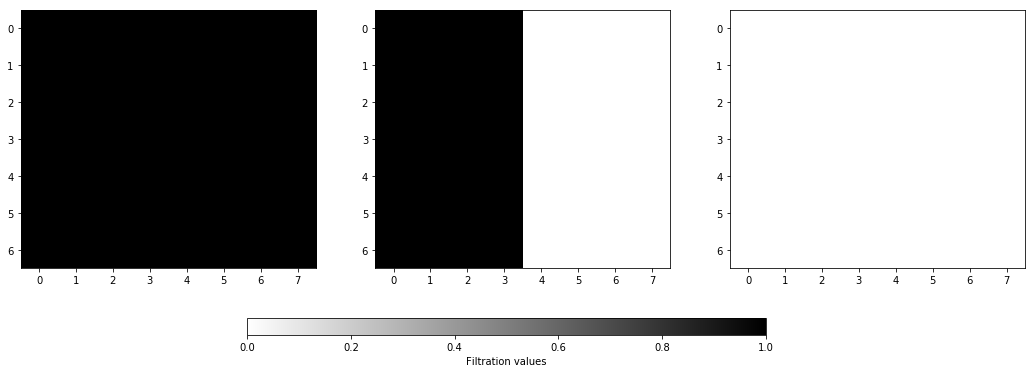

In [3]:
n_images = 4
prob = [0.8, 0.6, 0.4, 0.2]
images_2D = np.stack([np.random.rand(7, 8) < prob[i] for i in range(n_images)], axis=0)
images_2D = np.stack([np.ones((7, 8)), np.concatenate([np.ones((7, 4)), np.zeros((7, 4))], axis=1), np.zeros((7, 8))], axis=0)

print(images_2D.shape) # A collection of 3 2D images of 7 x 8

plot_images(images_2D)

### Invert image

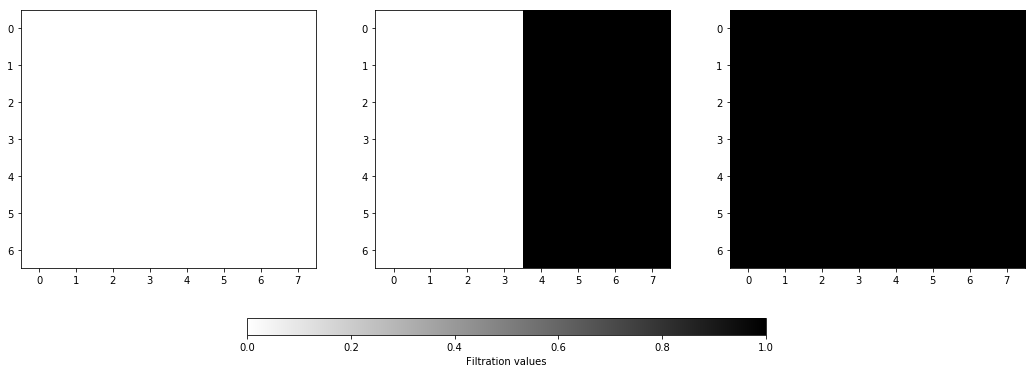

In [4]:
image_inverter = ImageInverter()
image_inverter.fit(images_2D)
inverted_images_2D = image_inverter.transform(images_2D)

plot_images(inverted_images_2D)

### Height filtration

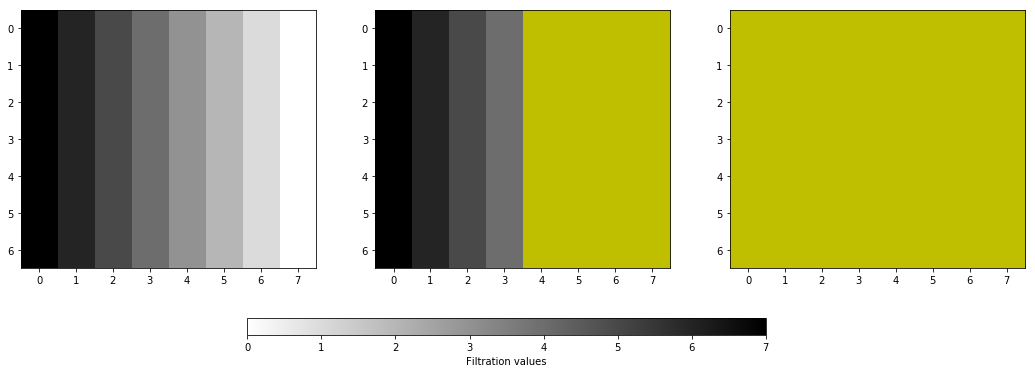

In [5]:
direction = np.array([-1, 0])

height_filtration = HeightFiltration(direction=direction, normalize=False)
height_filtration.fit(images_2D)
height_filtered_images_2D = height_filtration.transform(images_2D)

plot_images(height_filtered_images_2D)

### Radial filtration

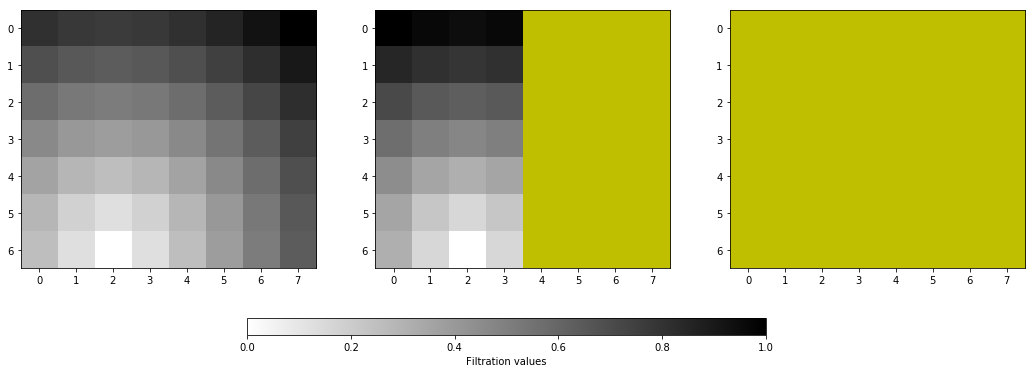

In [6]:
center = np.array([2, 6])
max_radius = 10

radial_filtration = RadialFiltration(center=center, max_radius=max_radius, normalize=False)
radial_filtration.fit(images_2D)
radial_filtered_images_2D = radial_filtration.transform(images_2D)

plot_images(radial_filtered_images_2D)

### Dilation filtration

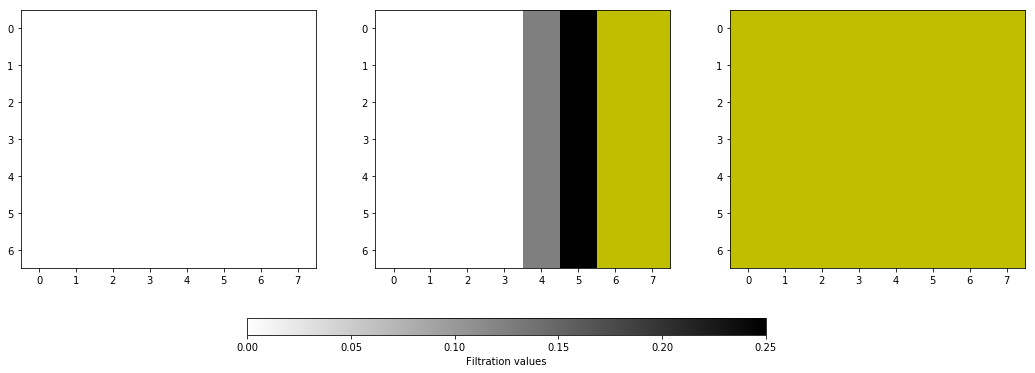

In [7]:
n_iterations = 2

dilation_filtration = DilationFiltration(n_iterations=n_iterations, normalize=True)
dilation_filtration.fit(images_2D)
dilation_filtered_images_2D = dilation_filtration.transform(images_2D)

plot_images(dilation_filtered_images_2D)

### Erosion filtration

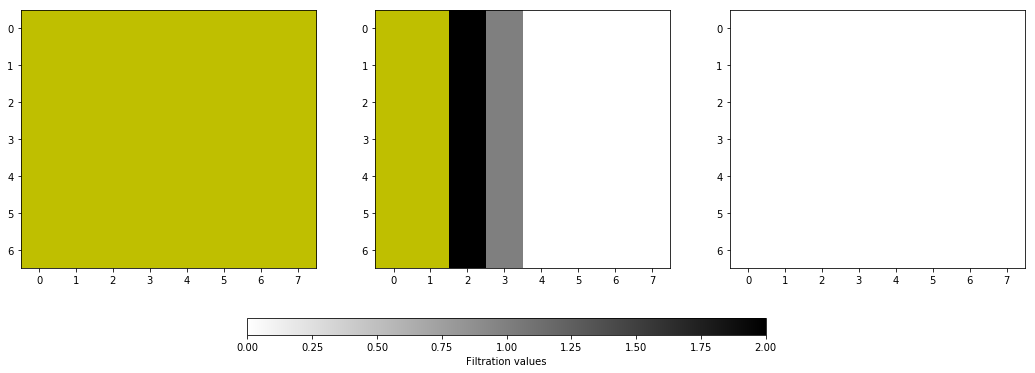

In [8]:
n_iterations = 2 # metric for dilatation

erosion_filtration = ErosionFiltration(n_iterations=n_iterations, normalize=False)
erosion_filtration.fit(images_2D)
erosion_filtered_images_2D = erosion_filtration.transform(images_2D)

plot_images(erosion_filtered_images_2D)

### Signed distance filtration

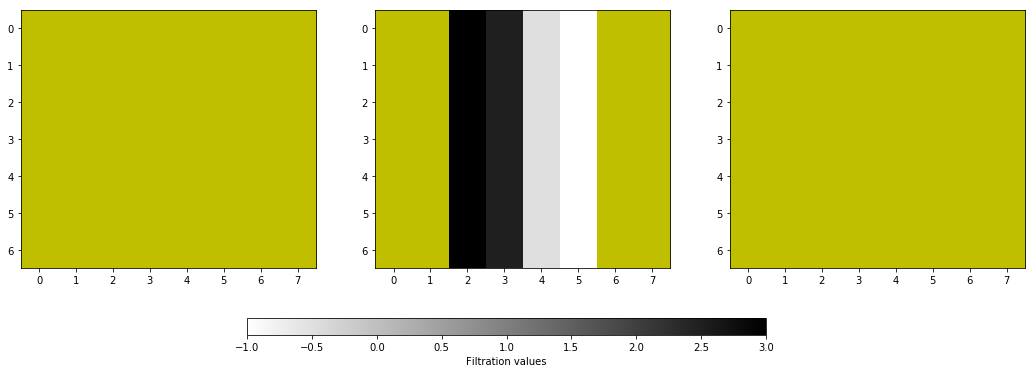

In [9]:
n_iterations = 2 # metric for dilatation

signed_distance_filtration = SignedDistanceFiltration(n_iterations=n_iterations, normalize=False)
signed_distance_filtration.fit(images_2D)
signed_distance_filtered_images_2D = signed_distance_filtration.transform(images_2D)

plot_images(signed_distance_filtered_images_2D)

## Collection of 3D images

(3, 7, 8, 4)


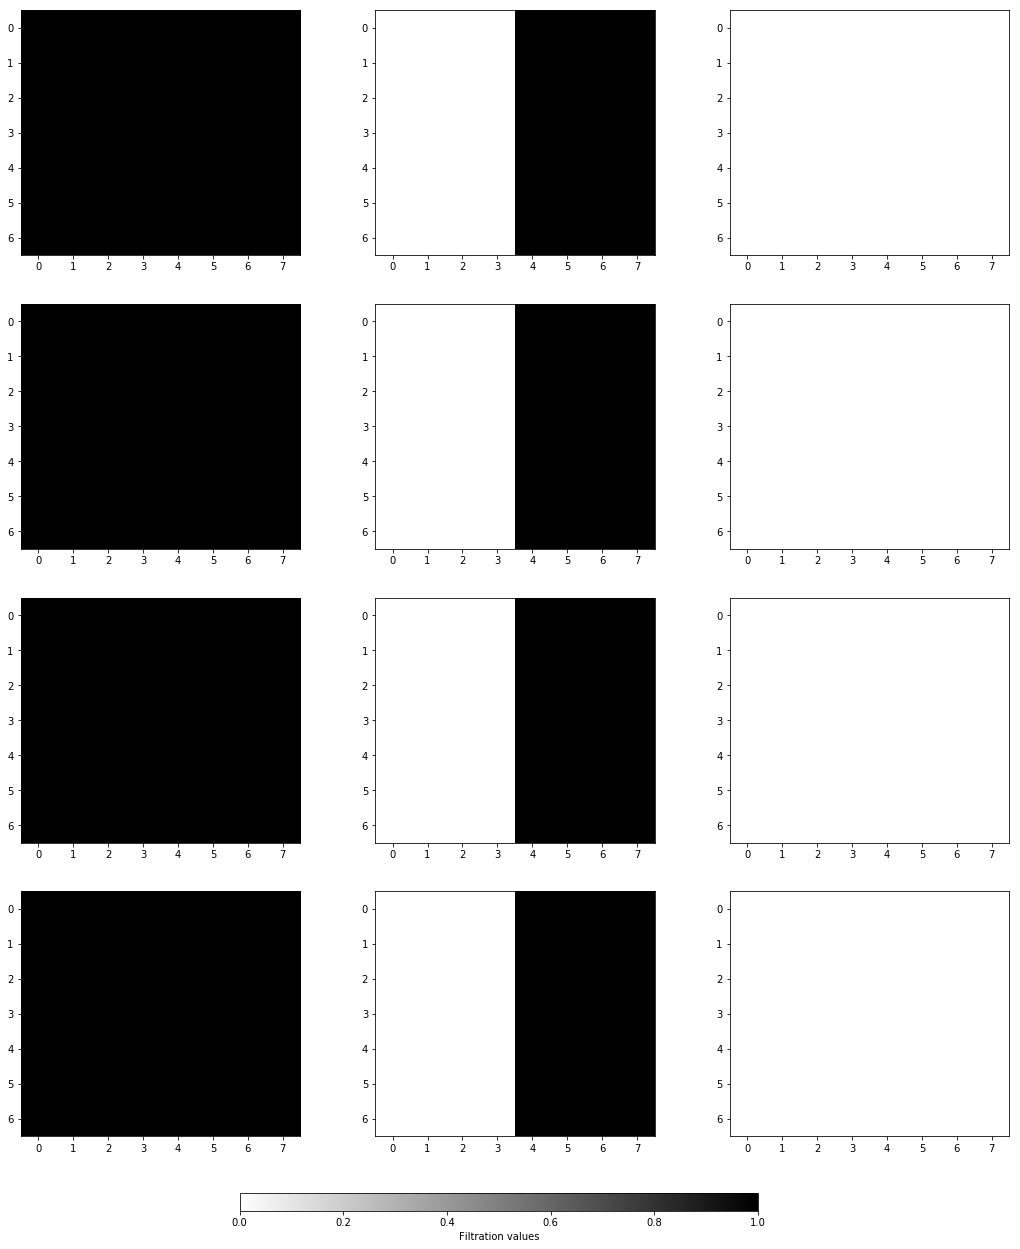

In [10]:
n_images = 4
prob = [0.8, 0.6, 0.4, 0.2]
images_3D = np.stack([np.random.rand(7, 8, 4) < prob[i] for i in range(n_images)], axis=0)
images_3D = np.stack([np.ones((7, 8, 4)), np.concatenate([np.zeros((7, 4, 4)), np.ones((7, 4, 4))], axis=1), np.zeros((7, 8, 4))], axis=0)


print(images_3D.shape) # A collection of 2 3D images of 7 x 8 x 4

plot_images(images_3D)

### Invert image

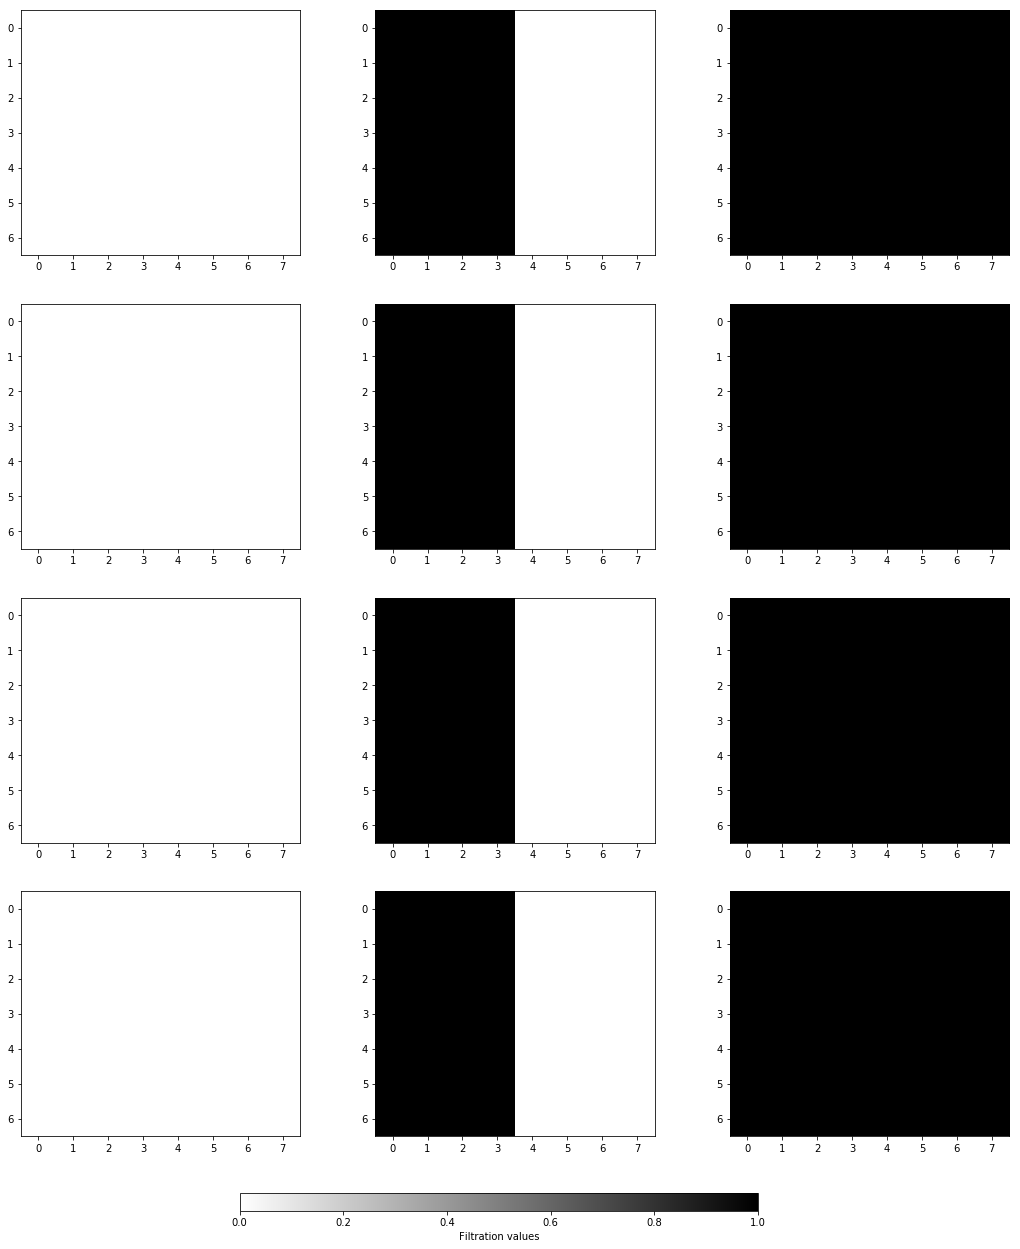

In [11]:
image_inverter = ImageInverter()
image_inverter.fit(images_3D)
inverted_images_3D = image_inverter.transform(images_3D)

plot_images(inverted_images_3D)

### Height filtration

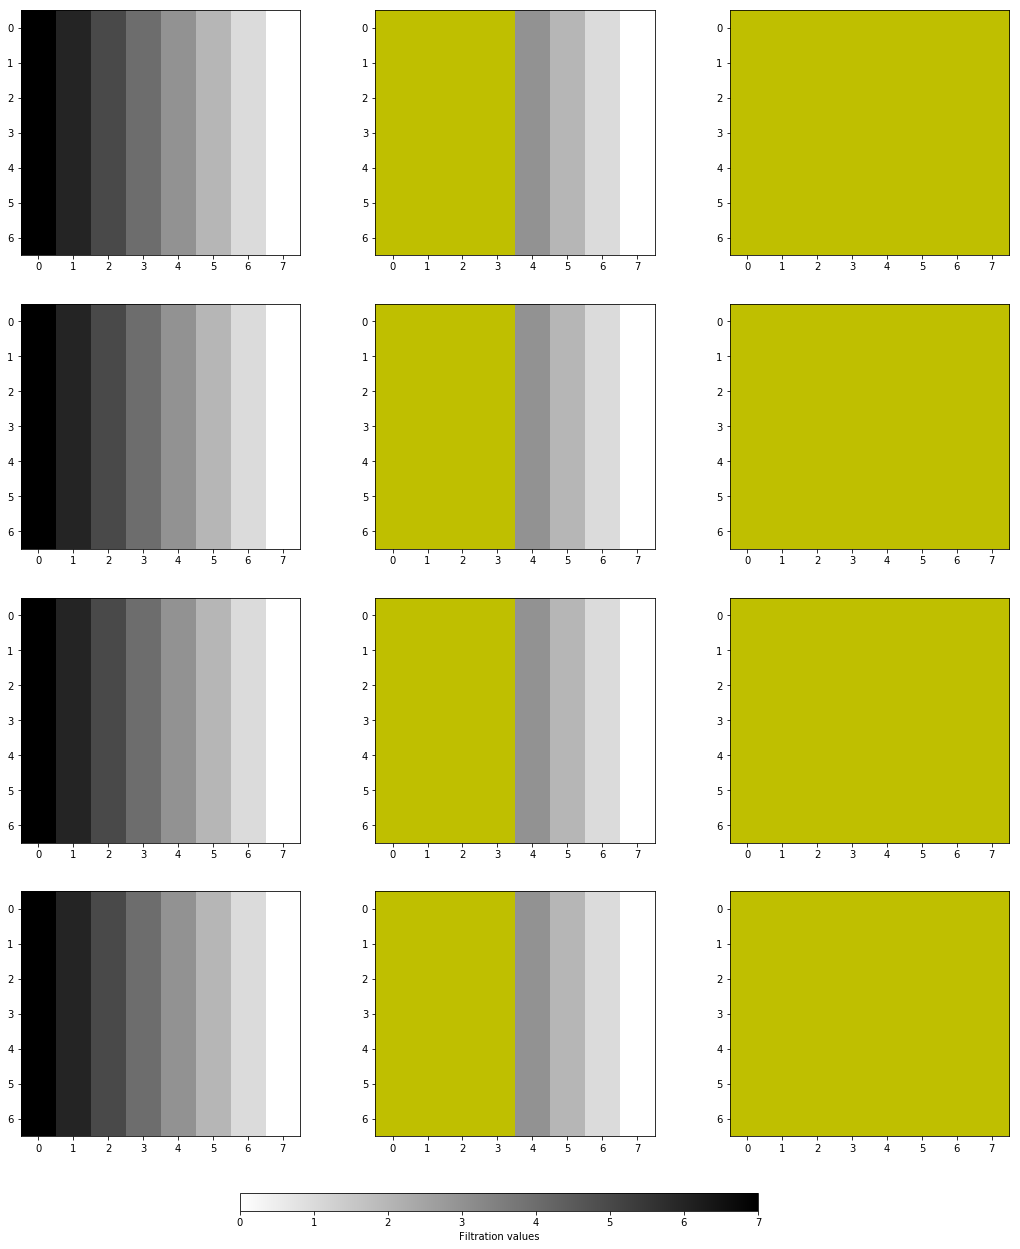

In [12]:
direction = np.array([-1, 0, 0])

height_filtration = HeightFiltration(direction=direction, normalize=False)
height_filtration.fit(images_3D)
height_filtered_images_3D = height_filtration.transform(images_3D)

plot_images(height_filtered_images_3D)

### Radial filtration

/home/l2f.ch/g.tauzin/software/giotto/giotto/images/filtrations.py:472: RuntimeWarning: invalid value encountered in multiply
  X_rad = np.nan_to_num(self._distance_center * X, nan=np.inf, posinf=np.inf)


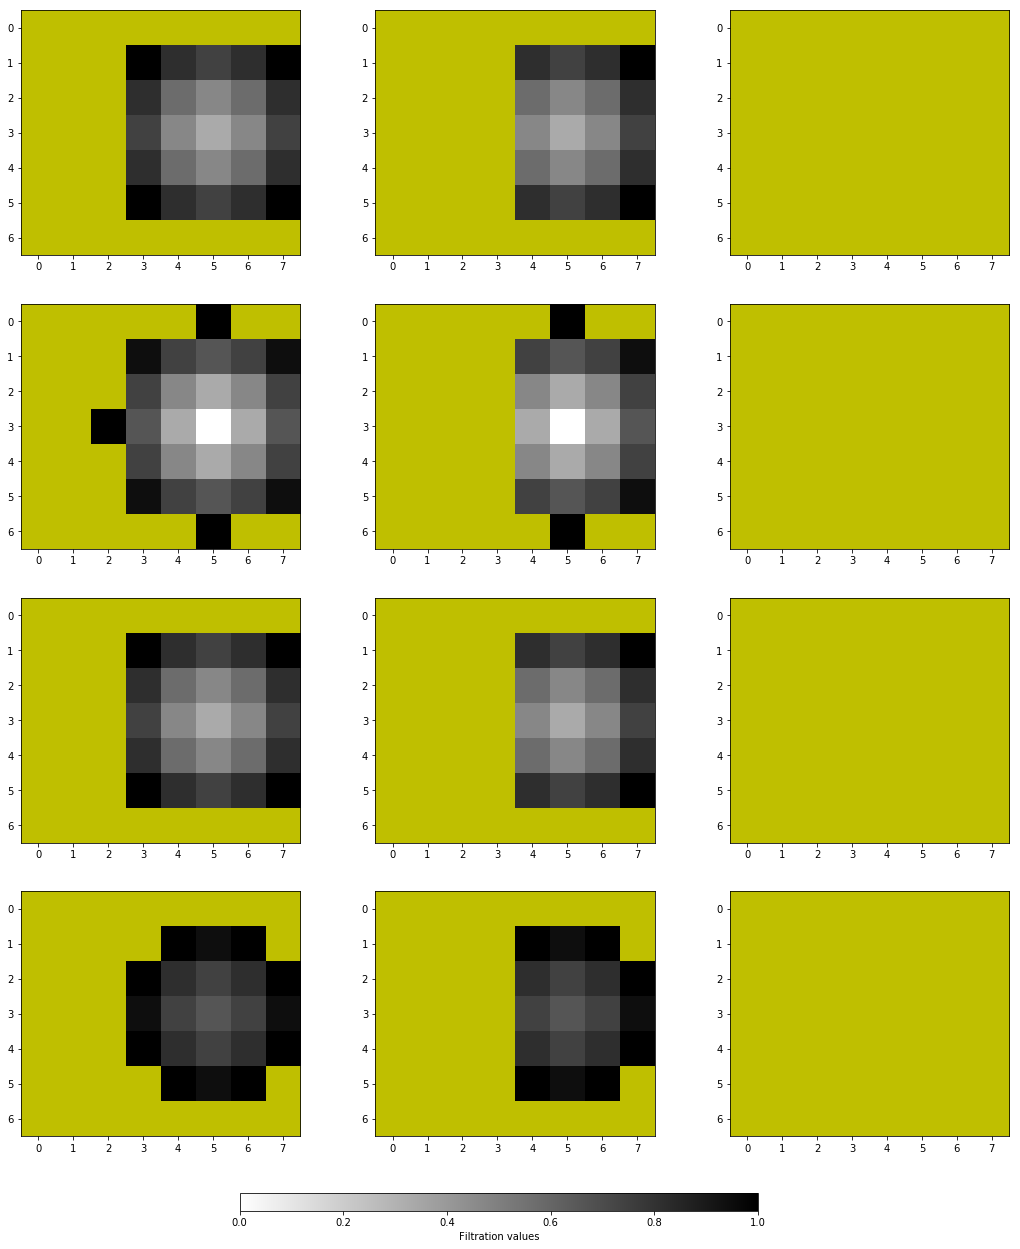

In [13]:
center = np.array([5, 3, 1])
max_radius = 3

radial_filtration = RadialFiltration(center=center, max_radius=max_radius, normalize=False)
radial_filtration.fit(images_3D)
radial_filtered_images_3D = radial_filtration.transform(images_3D)

plot_images(radial_filtered_images_3D)

### Dilation filtration

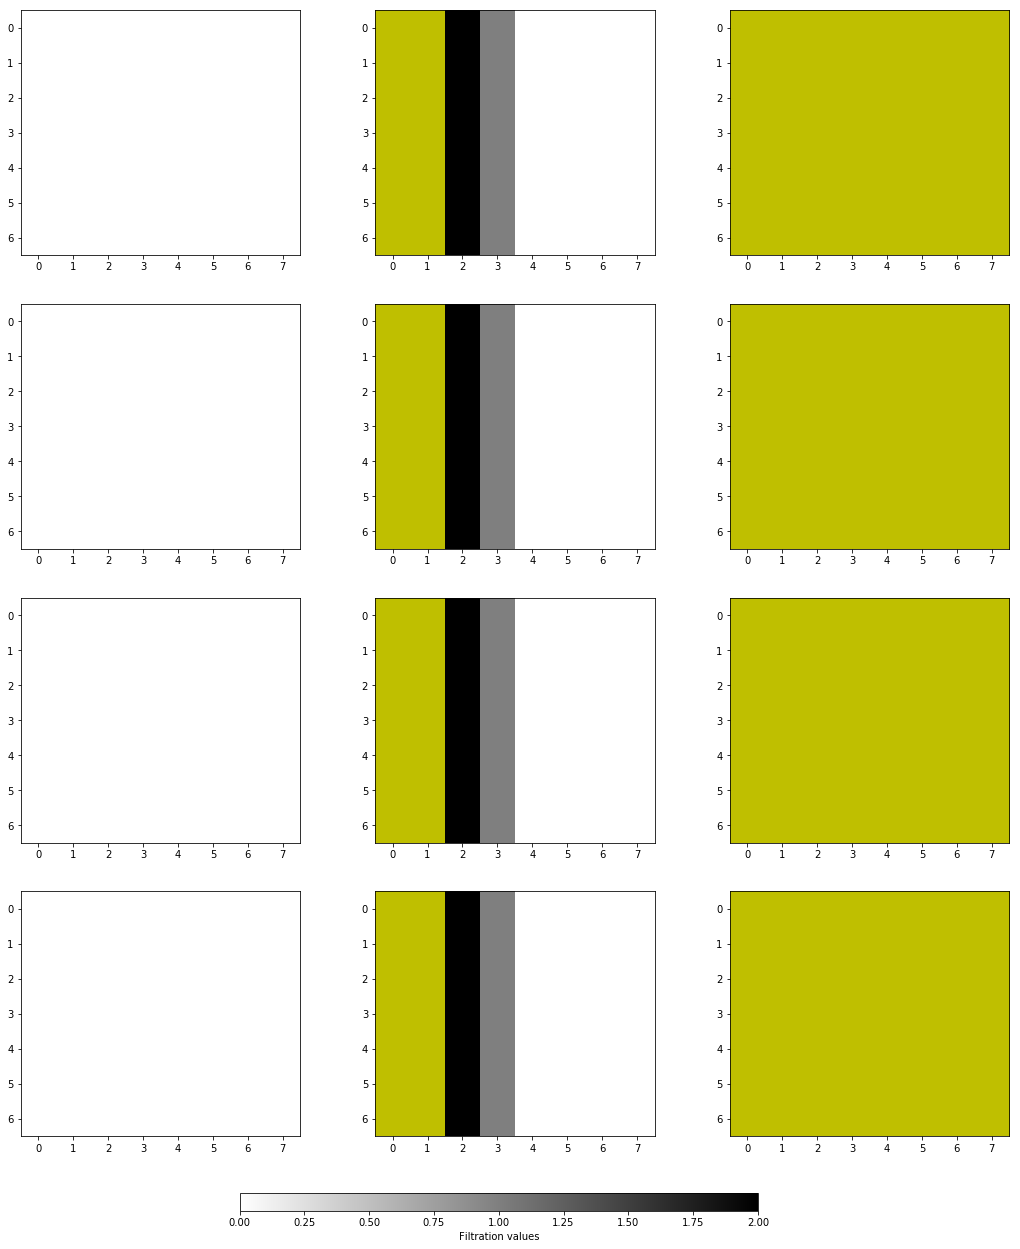

In [14]:
n_iterations = 2 # metric for dilatation

dilation_filtration = DilationFiltration(n_iterations=n_iterations, normalize=False)
dilation_filtration.fit(images_3D)
dilation_filtered_images_3D = dilation_filtration.transform(images_3D)

plot_images(dilation_filtered_images_3D)

### Erosion filtration

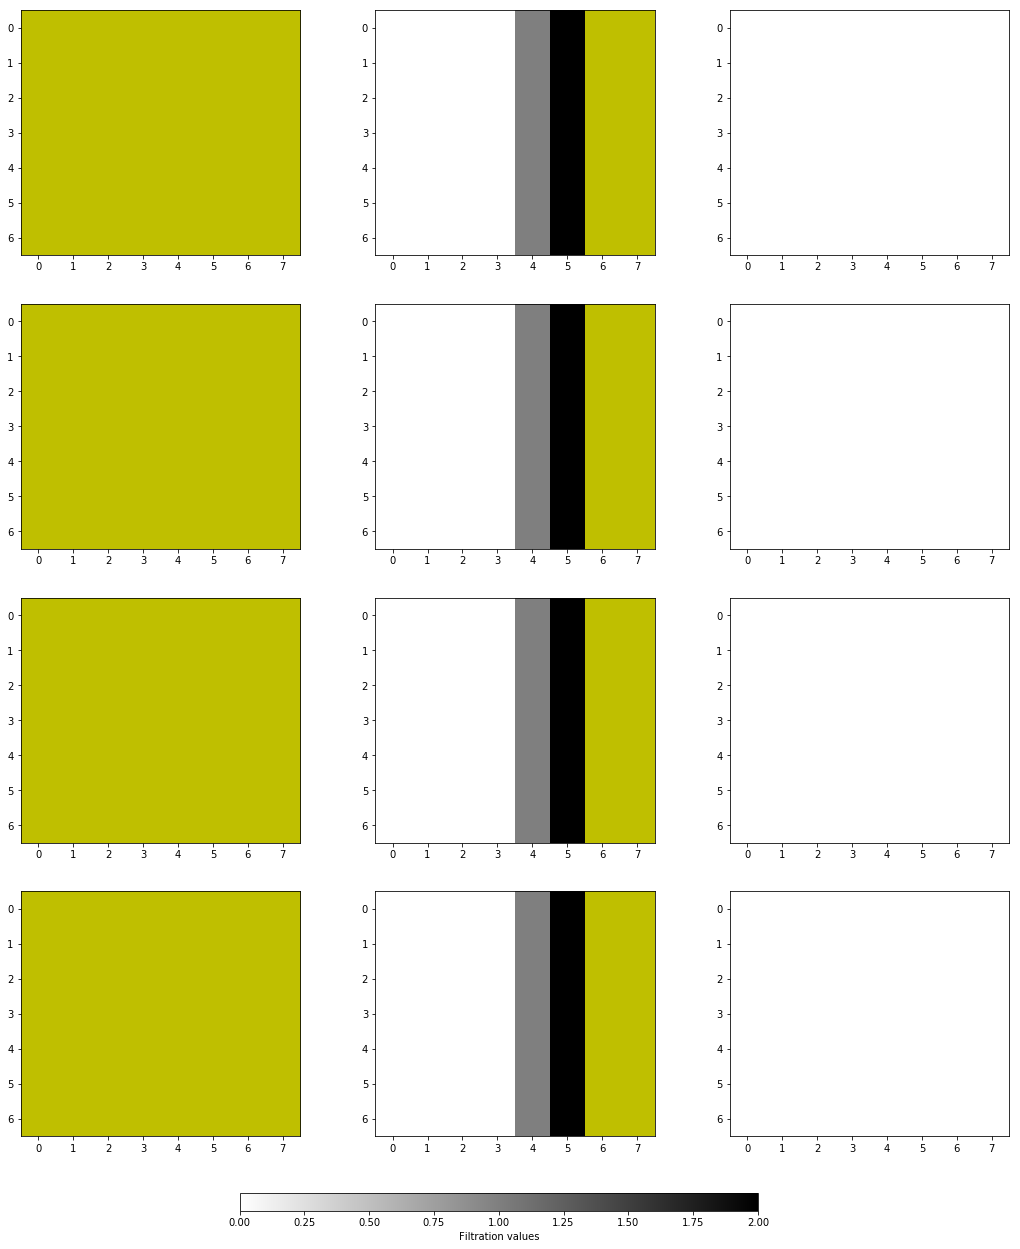

In [15]:
n_iterations = 2 # metric for dilatation

erosion_filtration = ErosionFiltration(n_iterations=n_iterations, normalize=False)
erosion_filtration.fit(images_3D)
erosion_filtered_images_3D = erosion_filtration.transform(images_3D)

plot_images(erosion_filtered_images_3D)

### Signed distance filtration

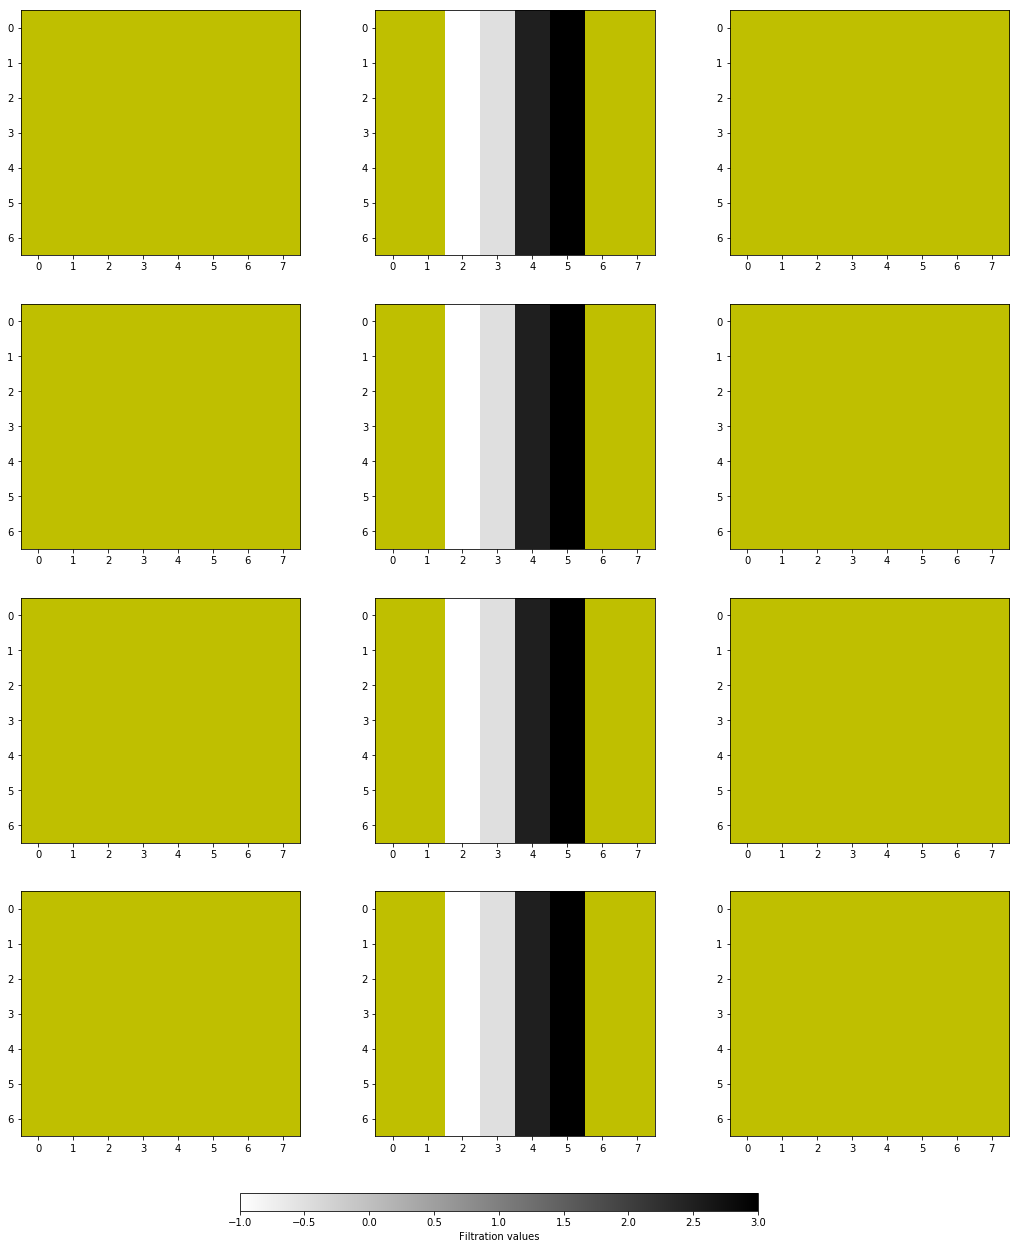

In [16]:
n_iterations = 2 # metric for dilatation

signed_distance_filtration = SignedDistanceFiltration(n_iterations=n_iterations, normalize=False)
signed_distance_filtration.fit(images_3D)
signed_distance_filtered_images_3D = signed_distance_filtration.transform(images_3D)

plot_images(signed_distance_filtered_images_3D)